# TP02 - [`seu nome e (RA)`]

Neste TP você implementará um algoritmo de regressão polinomial usando conceitos e notações que serão aproveitadas posteriormente em outros problemas.

**Instruções:**
- Não apague os comentários existentes, mas é claro que você pode adicionar outros comentários!

**Objetivos**
- Implementar código vetorizado usando classes
- Aplicar o algoritmo de aprendizado em modelos de diferentes capacidades
- Verificar na prática conceitos de generalização, overfitting e underfitting

## Escreva o seu RA na variável abaixo
Atribua o número do seu RA, sem os zeros à esquerda, na variável `RA` abaixo.

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 1 linha de código)
RA = None
### FIM DO CÓDIGO ###

## Dados de treinamento e teste

Para testar modelos de redes neurais, usamos, pelo menos, dois conjuntos de dados:
- **Dados de Treinamento**: usado para ajustar os parâmetros do modelo
- **Dados de Teste (ou validação)**: usado para avaliar o desempenho do modelo em dados não treinados, para verificar se o modelo *generaliza* bem

A função abaixo gera dados sintéticos, simulando uma situação real em que teríamos dados de entrada (`x_train` e `x_val`) com os respectivos rótulos de saída (`y_train` e `y_val`). Neste problema, os dados de entrada e de saída são unidimensionais.


<mark>**Faça:** </mark>
1. Use a função `carregaDados(m, m_val)`, já implementada, para gerar dados de treinamento e de teste, com diferentes quantidades
1. Verifique as dimensões dos vetores de dados produzidos
1. Use a função com `10` dados de treinamento e `30` dados de teste e gere um gráfico mostrando os dados de treinamento e teste

In [ ]:
import numpy as np, matplotlib.pyplot as plt

def carregaDados(m, m_val):
    """
    Função para carregar dados.
    Entradas
       - m: número de amostras de dados de treinamento (x_train, y_train)
       - m_val: número de amostras de dados de teste (x_val, y_val)
    Saídas
       - x_train, y_train: vetores de entrada e saída de treinamento
       - x_val, y_val: vetores de entrada e saída de validação
    """
    np.random.seed(RA*7)
    a, b, c, d = np.random.rand(4)
    x_train = np.random.uniform(-2, 2, m)
    x_val = np.random.uniform(-3, 3, m_val)
    y_train = 3*d*np.cos(1*x_train) + a/(.1*c + 1 + np.exp(-b*x_train))+np.random.normal(0,.25,m)
    y_val = 3*d*np.cos(1*x_val) + a/(.1*c + 1 + np.exp(-b*x_val))+np.random.normal(0,.05,m_val)
    return x_train, y_train, x_val, y_val

### SEU CÓDIGO COMEÇA AQUI ### (≈ 10 linhas de código)
None
### FIM DO CÓDIGO ###

**Saída esperada**

*Gráfico com os dados, semelhante ao gráfico abaixo. Atenção: o seu gráfico não será idêntico ao abaixo, pois há uma aleatoriedade na geração dos dados.*
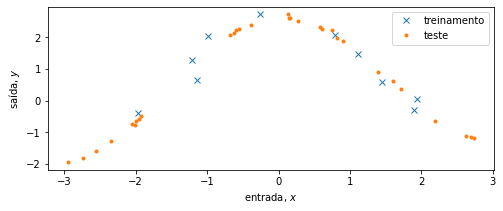
___

Crie agora a função `modeloPolin()` que fará o papel da rede neural. Essa função calculará uma saída $\hat{y}\in\mathbb{R}$ para uma determinada entrada $x\in\mathbb{R}$, com base em seu vetor de parâmetros $w\in\mathbb{R}^{n_g+1}$, em que $n_g$ é o grau do polinômio. Lembre-se, no problema em questão temos 1 entrada e 1 saída apenas. Contudo, o modelo implementará um polinômio de grau $n_g$, a depender da dimensão da entrada $w$. Exemplo (1): caso `w.size=4`, será considerado o polinômio $w_3 x^3+w_2 x^2+w_1 x+w_0$. Exemplo (2): caso `w.size=2`, será considerado o polinômio $w_1 x+w_0$. Note que o subíndice de $w$ denota a posição no vetor $w$.

1. Nome da função:
    + `modeloPolin()`
1. Entradas:
    + $x$: valor da entrada, vetor ou escalar, no formato `w.shape=(n,)`
    + $w$: vetor de pesos, vetor no formato `w.shape=(ng,)`
1. Saída:
    + $\hat{y}$: saída estimada pelo modleo, vetor ou escalar, no formato `w.shape=(n,)`

A função deve fazer o seguinte:
    + calcular $\hat{y}$ a partir de $x$ e $w$

Ao final, teste a função usando `modeloPolin(x=np.array([12,20]), w=np.array([1,2,3,4]))` e imprima o resultado.

## Modelo

Agora você vai criar o modelo. Esse modelo poderia ser uma SVM, uma rede neural, modelo RBF, entre outras. Mas, por enquanto, vamos começar com um modelo polinomial:
$$ \hat{y} = \theta_0 x^0 + \theta_1 x^1 + \theta_2 x^2 + \cdots + \theta_\ell x^\ell $$

em que $\ell$ é o grau do polinômio do modelo.

Apesar do problema original ter apenas uma entrada, consideraremos que cada termo $x^0$, $x^1$, $x^2$, ... do polinômio é uma entrada diferente. Ou seja, o nosso modelo terá o número de entradas (`input_size`) igual a
$$ n_x = \ell + 1 .$$

Usando a terminologia de redes neurais, o modelo possui um único neurônio, com função de ativação linear, e $\ell + 1$ entradas.

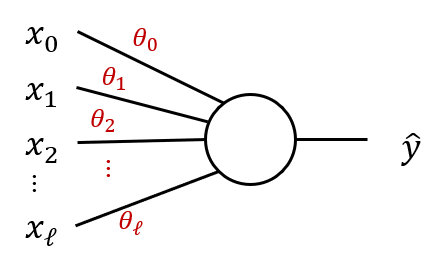

Vamos implementar esse modelo definindo uma "classe" de modelos polinomiais. Procure na internet alguns exemplos de como implementamos classes e objetos em Python. Encontre alguns exemplos em http://pythonclub.com.br/introducao-classes-metodos-python-basico.html.

<mark>**Faça:** </mark>
1. Crie uma classe chamada `polyModel`
1. A classe deve ter dois atributos: `input_size`, com o número de entradas do modelo; e `w`, com o vetor de pesos do modelo.
1. Na inicialização da instância da classe (método `__init__`), inicialize os pesos (`w`) de forma aleatória (distribuição normal, com média nula e desvio padrão pequeno). Além do `self` como primeiro parâmetro, este método deve receber também o número de entradas (`numEntradas`). O método vai ficar assim `__init__(self, numEntradas)`. O número de entradas recebido pelo método (`numEntradas`) deve atualizar o atributo `input_size` do objeto.
1. Crie um método `setWeights(self, novo_w)` dentro da classe para definir os pesos, em que o parâmetro `novo_w` é o vetor de pesos a serem atribuidos.
1. Crie uma função `forward(self, X)` dentro da classe para calcular a saída estimada ($\hat y$) para uma matriz de entrada $X$. Lembre-se que a dimensão da matriz $X$ será a mesma vista em sala de aula: dim($X$)$=(n_x, m)$. Como saída, deve ser gerado um vetor com $m$ elementos.
1. Deixe algum código de teste da sua classe, dos métodos e funções desenvolvidas.
1. Verifique se funcionou seu código retirando os comentários do trecho indicado por `###### DESCOMENTE AQUI PARA TESTAR`.
1. Confira se a saída gerada está igual ao gráfico mostrado em "Saída esperada" abaixo.

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 11 linhas de código)
None
### FIM DO CÓDIGO ###


# ###### DESCOMENTE AQUI PARA TESTAR
# m = 100 # quantidade de dados
# n_x = 4 # número de entradas (l-1)
# modelo = polyModel(n_x) # cria objeto chamado "modelo"
# modelo.setWeights(np.array((1,2,3,4))) # atribui alguns pesos específicos
# # Cria dados de Para gerar gráfico
# x = np.linspace(-5,5,m)
# X = np.array([x**p for p in np.arange(n_x)])
# # Usa o modelo para gerar saída
# yh = modelo.forward(X)
# plt.figure(figsize=(8,2))
# plt.plot(x, yh);
# plt.xlabel("entrada")
# plt.ylabel("saída do modelo");

**Saída esperada**

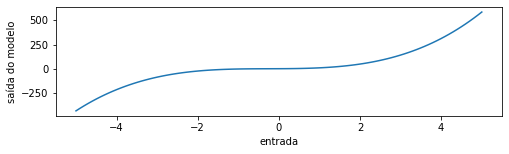
___

## Testando o modelo

Agora usaremos os dados de treinamento e validação já gerados para treinar modelos. Crie um modelo, usando a classe `polyModel` criada. Com os dados gerados, use os dados de *treinamento* para treinar o modelo. Para isso, faça o seguinte:
1. Arrange os dados de entrada numa matriz `X` com dimensões apropriadas (confira as dimensões!)
2. Implemente a solução de mínimos quadrados, conhecida como pseudo-inversa, usando a função disponível em `np.linalg.pinv` (confira as dimensões de todas as matrizes!)
3. Faça o treinamento do modelo, ou seja, ajuste os pesos do modelo criado com a solução de mínimos quadrados calculada.
4. Faça um gráfico comparando os dados de treinamento com a saída do modelo para os dados de treinamento.
4. Indique o RMSE obtido para os dados de treinamento no título do gráfico.
4. Faça um gráfico comparando os dados de teste com a saída do modelo para os dados de teste.
4. Indique o RMSE obtido para os dados de teste no título do gráfico.

Faça esse mesmo procedimento com 3 modelos diferentes: um de grau baixo (entre 1 e 2), outro de grau médio (entre 3 e 5) e outro de alto grau (maior que 6). Gere dois gráficos para cada situação, indicando os pontos do treinamento e da predição, com o valor do RMSE escrito no título do gráfico. Salve os valores de RMSE em variáveis separadas para cada caso: treinamento, validação, para cada um dos três modelos, totalizando 6 valores de RMSE diferentes. Exemplo: `RMSE_m1_trein`, `RMSE_m1_val`, `RMSE_m2_trein`, `RMSE_m2_val`, `RMSE_m3_trein`, `RMSE_m3_val`.

#### Modelo de baixa capacidade (grau $= 1$)

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 40 linhas de código)
None
### FIM DO CÓDIGO ###

#### Modelo de média capacidade (grau $\in \{3,4,5\}$)

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 40 linhas de código)
None
### FIM DO CÓDIGO ###

#### Modelo de alta capacidade (grau $> 6$)

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 40 linhas de código)
None
### FIM DO CÓDIGO ###

**Saída esperada**

Para cada uma das 3 células, são esperados 2 gráficos (total de 6 gráficos), indicando o desempenho do modelo nos dados de treinamento (1º gráfico) e nos dados de teste (2º gráfico). O código deve gerar também o RMSE calculado nos dados de treinamento (colocar no título com o 1º gráfico) e nos dados de teste (colocar no título com o 2º gráfico).
___

### Comparando os modelos gerados

Agora, compare o desempenho dos modelos em um gráfico de barra. Faça um gráfico mostrando o desempenho (valor RMSE) nos dados de treinamento e nos dados validação. Note a diferença de desempenho nos dados de treinamento e de validação de cada modelo.

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 15 linhas de código)
None
### FIM DO CÓDIGO ###

## LIÇÕES

Nesta prática você comparou três modelos diferentes. Qual é o melhor? Note que essa resposta depende de várias questões. Talvez o melhor desempenho nos dados de treinamento não signifique, necessariamente, um bom desempenho em outros casos. A questão central que devemos buscar é uma boa *capacidade de generalização* do modelo. Quanto maior, melhor!

Os indicadores de desempenho nos dados de treinamento e validação são usados para estimar a *capacidade de generalização* de um método modelo e forma de treinamento.

Nesta prática, você experimentou três sitações muito comuns no treinamento de modelos: *undefitting*, *overfitting* e um modelo de capacidade adequada mas que, ainda assim, o desempenho nos dados de treinamento são bem superiores aos dos dados de validação.

## AVALIE SEU APRENDIZADO

Após o desenvolvimento desta atividade, espera-se que você seja capaz de
- escrever programas em Python usando classes e objetos
- compreender como os elementos necessários para desenvolvimento de um modelo: dados, modelo, algoritmo de treinamento
- identificar situações de *undefitting* e *overfitting*, baseado no desempenho do modelo nos dados de treinamento e validação